## Food2Fork API ##
www.food2fork.com/about/api

In [1]:
import re
import requests
import urllib2
import json
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import nltk

In [2]:
%matplotlib inline

#### Load API credentials ####

In [3]:
def loadCredentials():
    filename = 'secrets.txt'
    for line in open(filename).readlines():
        if "API" in line:    
            api_key = line.split(": ")[1].translate(None,'\n')
        
    return api_key

In [4]:
API_KEY = loadCredentials()

In [5]:
URL_API = 'http://food2fork.com/api'
URL_SEARCH = URL_API + '/search/?'
URL_GET = URL_API + '/get/?'

# Base URLs
search_url = "http://food2fork.com/api/search"
recipe_url = "http://food2fork.com/api/get"

#### Make a GET request to the API ####

In [7]:
# api_request = search_url + ""
page = 1
while True:    
#     api_request = "http://food2fork.com/api/search?key="+API_KEY+"&q=shredded%20chicken&page="+str(page)
    api_request = "http://food2fork.com/api/search?key="+API_KEY+"&q=chocolate%20chip%20cookies&page="+str(page)

    # I don't understand headers well enough yet, but I got a 403 error without this header
    # https://en.wikipedia.org/wiki/User_agent
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64)'}

    request = urllib2.Request(api_request, headers=hdr)
    response = urllib2.urlopen(request)
    raw = response.read()
    json_obj = json.loads(raw)    
    
    if json_obj['count']!=30 or page == 1:
        print("\nPage {p} is the last page.".format(p=page))
        break
    elif page==1:
        print("\nPage: {p}, ".format(p=page)),
    else:
        print("{p}, ".format(p=page)),
        
    page += 1
    
recipes = json_obj['recipes']


Page 1 is the last page.


### Scrape ingredients from a Food2Fork.com page ###

In [93]:
def getIngredients(json_obj):
    URL = json_obj['f2f_url']
    page = requests.get(URL)
    html = BeautifulSoup(page.text, "html.parser")
    
    ingredientsList = html.find_all("li")
    ingredients = [i.text for i in ingredientsList if ("ingredients" in i.decode()) and (i.text!='')] # Feels like a kludge...
    return ingredients

In [94]:
getIngredients(recipes[0])

[u' 1 cup butter, softened',
 u' 1 cup packed light brown sugar',
 u' 1/2 cup white sugar',
 u' 2 eggs',
 u' 2 teaspoons vanilla extract',
 u' 1 1/4 cups all-purpose flour',
 u' 1/2 teaspoon baking soda',
 u' 1 teaspoon salt',
 u' 3 cups quick-cooking oats',
 u' 1 cup chopped walnuts',
 u' 1 cup semisweet chocolate chips']

In [98]:
[(recipe['title'],getIngredients(recipe)) for recipe in recipes[:4]]

[(u'Chewy Chocolate Chip Oatmeal Cookies',
  [u' 1 cup butter, softened',
   u' 1 cup packed light brown sugar',
   u' 1/2 cup white sugar',
   u' 2 eggs',
   u' 2 teaspoons vanilla extract',
   u' 1 1/4 cups all-purpose flour',
   u' 1/2 teaspoon baking soda',
   u' 1 teaspoon salt',
   u' 3 cups quick-cooking oats',
   u' 1 cup chopped walnuts',
   u' 1 cup semisweet chocolate chips']),
 (u'Vanilla Pudding Chocolate Chip Cookies',
  [u' 1 cup unsalted butter, at room temperature',
   u' 3/4 cup brown sugar',
   u' 1/4 cup granulated sugar',
   u' 3.4 oz. package vanilla instant pudding mix',
   u' 2 large eggs',
   u' 1 teaspoon vanilla extract',
   u' 2 1/4 cups all-purpose flour',
   u' 1 teaspoon baking soda',
   u' 1/2 teaspoon salt',
   u' 2 cups semi-sweet chocolate chips']),
 (u'Best Chocolate Chip Cookies',
  [u' 1 cup butter, softened',
   u' 1 cup white sugar',
   u' 1 cup packed brown sugar',
   u' 2 eggs',
   u' 2 teaspoons vanilla extract',
   u' 3 cups all-purpose flour

## Use NLTK to parse amounts out from ingredients ##

In [ ]:
import nltk

In [130]:
re.findall("[0-9]",ingredients[0])

[u'1']

### Load json object from disk (for offline work) ###

In [18]:
raw = open("cookies.txt","r").read()
# raw = open("chicken.txt","r").read()
json_obj = json.loads(raw)

In [11]:
# This is how you save a json object as a text file. It's easy!
with open("cookies.txt","w") as outfile:
    json.dump(json_obj, outfile)

### Misc ###

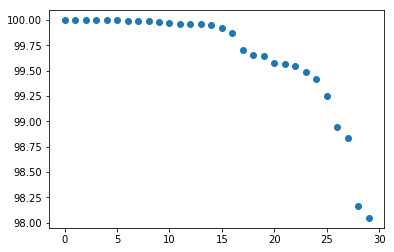

In [21]:
scores = [recipe['social_rank'] for recipe in json_obj]
plt.plot(scores,'o')
plt.show()